In [469]:
# Sales Prediction for a Retail chain which operates over several shops across a specific country. 

In [470]:
import numpy as np
import pandas as pd

In [471]:
store = pd.read_csv("store_sales.csv")
temp = pd.read_csv("temperature.csv")
macro = pd.read_csv("macro_economic.csv")

In [472]:
store.head()

,date,day,month,year,day_of_week,open,sales,customers,promo,state_holiday,school_holiday
0,01/01/2013,1,1,2013,2,16,94589.0,18866.0,0,1,1
1,02/01/2013,2,1,2013,3,930,5884914.0,724219.0,0,0,1
2,03/01/2013,3,1,2013,4,928,5397797.0,663772.0,0,0,1
3,04/01/2013,4,1,2013,5,928,5625456.0,680237.0,0,0,1
4,05/01/2013,5,1,2013,6,927,4972166.0,592567.0,0,0,1


In [473]:
temp.head()

,month,Avg_temp
0,1,-2.64
1,2,-0.71
2,3,3.29
3,4,8.62
4,5,14.34


In [474]:
macro.head()

,Year,GDP(Trillions),Income_per_Capita(Dollars),population(millions),Inflation_rate(percentage),Inflation_change(percentage)
0,2013,16.5,44489,316.2,1.46,-0.60
1,2014,17.2,46486,318.6,1.62,0.16
2,2015,17.8,48429,321.0,0.12,-1.50


In [475]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            942 non-null    object 
 1   day             942 non-null    int64  
 2   month           942 non-null    int64  
 3   year            942 non-null    int64  
 4   day_of_week     942 non-null    int64  
 5   open            942 non-null    int64  
 6   sales           912 non-null    float64
 7   customers       912 non-null    float64
 8   promo           942 non-null    int64  
 9   state_holiday   942 non-null    int64  
 10  school_holiday  942 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 81.1+ KB


In [476]:
# Now we need to merge the datasets based on particular column
store = pd.merge(store, temp, on = 'month')
macro = macro.rename(columns = {'Year': 'year'})
store = pd.merge(store, macro, on = 'year')


In [477]:
store.shape

(942, 17)

In [478]:
store

,date,day,month,year,day_of_week,open,sales,customers,promo,state_holiday,school_holiday,Avg_temp,GDP(Trillions),Income_per_Capita(Dollars),population(millions),Inflation_rate(percentage),Inflation_change(percentage)
0,01/01/2013,1,1,2013,2,16,94589.0,18866.0,0,1,1,-2.64,16.5,44489,316.2,1.46,-0.6
1,02/01/2013,2,1,2013,3,930,5884914.0,724219.0,0,0,1,-2.64,16.5,44489,316.2,1.46,-0.6
2,03/01/2013,3,1,2013,4,928,5397797.0,663772.0,0,0,1,-2.64,16.5,44489,316.2,1.46,-0.6
3,04/01/2013,4,1,2013,5,928,5625456.0,680237.0,0,0,1,-2.64,16.5,44489,316.2,1.46,-0.6
4,05/01/2013,5,1,2013,6,927,4972166.0,592567.0,0,0,1,-2.64,16.5,44489,316.2,1.46,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,27/07/2015,27,7,2015,1,932,NaN,NaN,1,0,1,21.82,17.8,48429,321.0,0.12,-1.5
938,28/07/2015,28,7,2015,2,932,NaN,NaN,1,0,1,21.82,17.8,48429,321.0,0.12,-1.5
939,29/07/2015,29,7,2015,3,932,NaN,NaN,1,0,1,21.82,17.8,48429,321.0,0.12,-1.5
940,30/07/2015,30,7,2015,4,932,NaN,NaN,1,0,1,21.82,17.8,48429,321.0,0.12,-1.5


In [479]:
# Remove the columns which are repetitive and think they do not have much impact on model much
# Since we don't have data of customers for the month of July,so we remove customers column
store = store.drop(columns = ['date','day','month','year','customers','GDP(Trillions)','population(millions)','Inflation_change(percentage)'])

In [480]:
# we have to predict sales for the month of July (2 nd to 31 st). so take july month details 
testing = store[store['sales'].isna()]

In [481]:
testing.shape

(30, 9)

In [482]:
testing

,day_of_week,open,sales,promo,state_holiday,school_holiday,Avg_temp,Income_per_Capita(Dollars),Inflation_rate(percentage)
912,4,934,NaN,1,0,0,21.82,48429,0.12
913,5,934,NaN,1,0,0,21.82,48429,0.12
914,6,934,NaN,0,0,0,21.82,48429,0.12
915,7,32,NaN,0,0,0,21.82,48429,0.12
916,1,934,NaN,0,0,0,21.82,48429,0.12
917,2,934,NaN,0,0,0,21.82,48429,0.12
918,3,934,NaN,0,0,0,21.82,48429,0.12
919,4,934,NaN,0,0,0,21.82,48429,0.12
920,5,934,NaN,0,0,0,21.82,48429,0.12
921,6,933,NaN,0,0,0,21.82,48429,0.12


In [483]:
# Now remove this testing data from store dataset for the training purpose
store = store[~store['sales'].isna()]

In [484]:
store.shape

(912, 9)

In [485]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 911
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   day_of_week                 912 non-null    int64  
 1   open                        912 non-null    int64  
 2   sales                       912 non-null    float64
 3   promo                       912 non-null    int64  
 4   state_holiday               912 non-null    int64  
 5   school_holiday              912 non-null    int64  
 6   Avg_temp                    912 non-null    float64
 7   Income_per_Capita(Dollars)  912 non-null    int64  
 8   Inflation_rate(percentage)  912 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 71.2 KB


In [486]:
# Now perform Data Cleaning

In [487]:
store.isnull().sum()

day_of_week                   0
open                          0
sales                         0
promo                         0
state_holiday                 0
school_holiday                0
Avg_temp                      0
Income_per_Capita(Dollars)    0
Inflation_rate(percentage)    0
dtype: int64

In [488]:
store.duplicated().sum()

0

In [489]:
store.describe()

,day_of_week,open,sales,promo,state_holiday,school_holiday,Avg_temp,Income_per_Capita(Dollars),Inflation_rate(percentage)
count,912.000000,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,3.996711,775.517544,5.434012e+06,0.381579,0.029605,0.206140,9.047774,46074.509868,1.256623
std,2.000272,340.109438,2.728459e+06,0.486041,0.169589,0.404754,8.576125,1477.342601,0.572342
min,1.000000,15.000000,9.458900e+04,0.000000,0.000000,0.000000,-2.640000,44489.000000,0.120000
25%,2.000000,928.000000,4.959635e+06,0.000000,0.000000,0.000000,-0.710000,44489.000000,1.460000
50%,4.000000,932.000000,5.639772e+06,0.000000,0.000000,0.000000,8.620000,46486.000000,1.460000
75%,6.000000,934.000000,7.084768e+06,1.000000,0.000000,0.000000,16.820000,46486.000000,1.620000
max,7.000000,934.000000,1.337231e+07,1.000000,1.000000,1.000000,21.820000,48429.000000,1.620000


In [490]:
store.corr()

,day_of_week,open,sales,promo,state_holiday,school_holiday,Avg_temp,Income_per_Capita(Dollars),Inflation_rate(percentage)
day_of_week,1.000000,-0.546606,-0.624697,-0.395010,-0.054723,-0.062885,-0.000628,0.001025,-0.000738
open,-0.546606,1.000000,0.866578,0.306683,-0.363172,-0.007043,0.010138,-0.005863,0.007892
sales,-0.624697,0.866578,1.000000,0.610873,-0.311322,0.014977,-0.020037,0.025795,-0.010219
promo,-0.395010,0.306683,0.610873,1.000000,-0.004030,0.012628,0.012589,0.023607,-0.018328
state_holiday,-0.054723,-0.363172,-0.311322,-0.004030,1.000000,0.118885,-0.003328,0.020773,-0.025885
school_holiday,-0.062885,-0.007043,0.014977,0.012628,0.118885,1.000000,0.124040,-0.091024,0.110760
Avg_temp,-0.000628,0.010138,-0.020037,0.012589,-0.003328,0.124040,1.000000,-0.088423,0.110182
Income_per_Capita(Dollars),0.001025,-0.005863,0.025795,0.023607,0.020773,-0.091024,-0.088423,1.000000,-0.714252
Inflation_rate(percentage),-0.000738,0.007892,-0.010219,-0.018328,-0.025885,0.110760,0.110182,-0.714252,1.000000


In [491]:
store.head()

,day_of_week,open,sales,promo,state_holiday,school_holiday,Avg_temp,Income_per_Capita(Dollars),Inflation_rate(percentage)
0,2,16,94589.0,0,1,1,-2.64,44489,1.46
1,3,930,5884914.0,0,0,1,-2.64,44489,1.46
2,4,928,5397797.0,0,0,1,-2.64,44489,1.46
3,5,928,5625456.0,0,0,1,-2.64,44489,1.46
4,6,927,4972166.0,0,0,1,-2.64,44489,1.46


In [492]:
# Now we have selected important features require for model development
pd.value_counts(store.day_of_week)

2    131
3    131
1    130
4    130
5    130
6    130
7    130
Name: day_of_week, dtype: int64

In [493]:
pd.value_counts(store.promo)

0    564
1    348
Name: promo, dtype: int64

In [494]:
pd.value_counts(store.state_holiday)

0    885
1     27
Name: state_holiday, dtype: int64

In [495]:
pd.value_counts(store.school_holiday)

0    724
1    188
Name: school_holiday, dtype: int64

In [496]:
# we observed that in July month there are no state holidays from the dataset

In [497]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

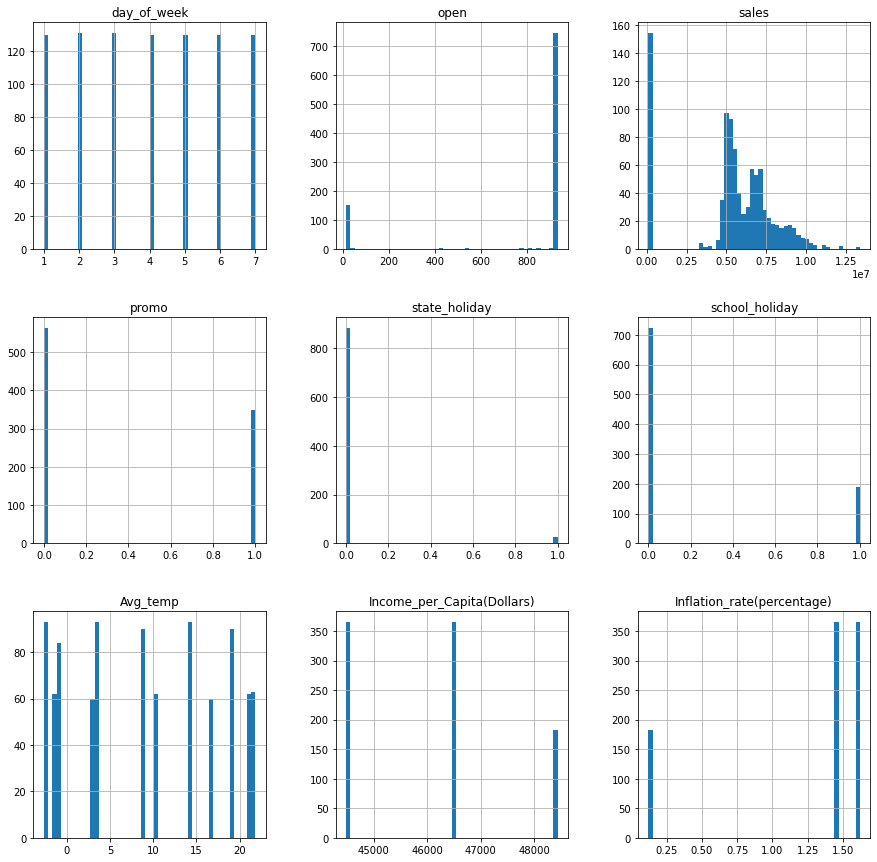

In [498]:
store.hist(bins=50, figsize=(15,15))
plt.show()

<BarContainer object of 912 artists>

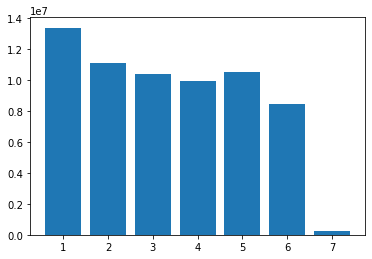

In [499]:
plt.bar(store['day_of_week'], store['sales'])

<BarContainer object of 912 artists>

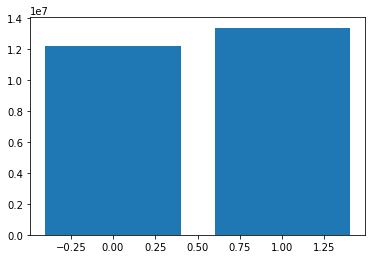

In [500]:
plt.bar(store['promo'], store['sales'])

<BarContainer object of 912 artists>

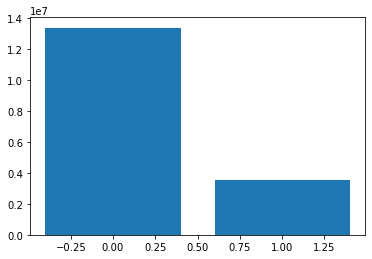

In [501]:
plt.bar(store['state_holiday'], store['sales'])

<BarContainer object of 912 artists>

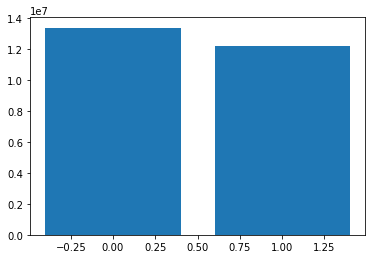

In [502]:
plt.bar(store['school_holiday'], store['sales'])

<BarContainer object of 912 artists>

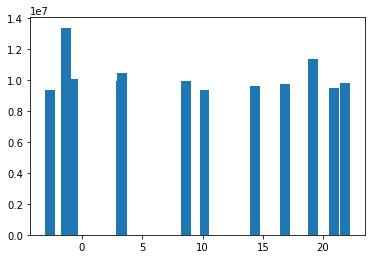

In [503]:
plt.bar(store['Avg_temp'], store['sales'])

<AxesSubplot:xlabel='open', ylabel='sales'>

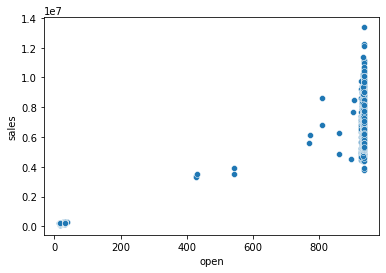

In [504]:
sns.scatterplot(x = store['open'], y = store['sales'])

<AxesSubplot:>

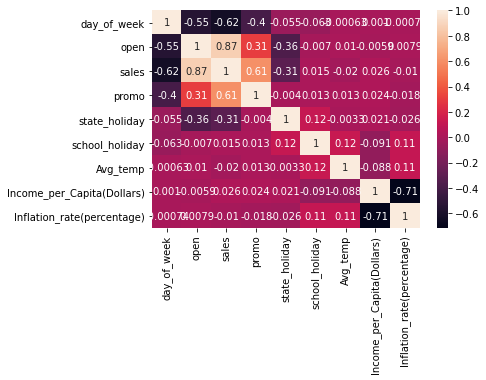

In [505]:
sns.heatmap(store.corr(), annot = True)

In [506]:
# By observing above heatmap there is very less impact on school_holiday, Avg_temp, Income_per_Capita(Dollars), Inflation_rate(percentage).
# so these columns, which are less correation on sales (minimal effect on model)


In [507]:
# Model Building

In [508]:
X = store.drop(columns='sales')
Y = store['sales']

In [509]:
X.head()

,day_of_week,open,promo,state_holiday,school_holiday,Avg_temp,Income_per_Capita(Dollars),Inflation_rate(percentage)
0,2,16,0,1,1,-2.64,44489,1.46
1,3,930,0,0,1,-2.64,44489,1.46
2,4,928,0,0,1,-2.64,44489,1.46
3,5,928,0,0,1,-2.64,44489,1.46
4,6,927,0,0,1,-2.64,44489,1.46


In [510]:
Y.head()

0      94589.0
1    5884914.0
2    5397797.0
3    5625456.0
4    4972166.0
Name: sales, dtype: float64

In [511]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [512]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [513]:
model = LinearRegression()

In [514]:
model.fit(X_train, Y_train)

LinearRegression()

In [515]:
y_pred = model.predict(X_test)

In [516]:
r2_score(Y_test, y_pred)

0.8965800272709944

In [517]:
# We got an accuracy of 89.65% which means our model is performing good

In [518]:
# Now we need to predict sales for the July month
testing = testing.drop(columns='sales')

In [519]:
testing.head()

,day_of_week,open,promo,state_holiday,school_holiday,Avg_temp,Income_per_Capita(Dollars),Inflation_rate(percentage)
912,4,934,1,0,0,21.82,48429,0.12
913,5,934,1,0,0,21.82,48429,0.12
914,6,934,0,0,0,21.82,48429,0.12
915,7,32,0,0,0,21.82,48429,0.12
916,1,934,0,0,0,21.82,48429,0.12


In [520]:
model.predict(testing)

array([7438314.65760887, 7271387.58214121, 5112543.25811353,
        160831.3858728 , 5947178.63545184, 5780251.55998418,
       5613324.48451651, 5446397.40904885, 5279470.33358119,
       5107238.61864926,  155526.74640853, 7933791.24454759,
       7766864.16907992, 7599937.09361226, 7427705.37868033,
       7260778.30321267, 5101933.97918499,  155526.74640853,
       5936569.35652329, 5769642.28105563, 5602715.20558797,
       5435788.13012031, 5268861.05465265, 5101933.97918499,
        155526.74640853, 8059304.91067262, 7892377.83520496,
       7725450.7597373 , 7558523.68426964, 7391596.60880197])

In [521]:
# So we found Sales Prediction in the month of July from 2 nd to 31 st.